In [1]:
%matplotlib inline

In [2]:
import utils; reload(utils)
from utils import *

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
Using Theano backend.


In [3]:
import keras

In [4]:
# Linear models in Keras

In [5]:
x = random((30, 2))
y = np.dot(x, [2., 3.]) + 1

In [6]:
??keras.models.Sequential

In [7]:
??keras.layers.Dense

In [8]:
keras_lm_model = keras.models.Sequential([
    keras.layers.Dense(1, input_shape = (2,))
])

In [13]:
??keras_lm_model.compile

In [9]:
keras_lm_model.compile(optimizer = keras.optimizers.SGD(lr = 0.1),
                      loss = 'mse')

In [15]:
??keras_lm_model.evaluate

In [10]:
keras_lm_model.evaluate(x, y, verbose = 0)

16.635866165161133

In [11]:
keras_lm_model.fit(x, y, nb_epoch = 20, batch_size = 1)

Epoch 1/20
0s - loss: 1.4762
Epoch 2/20
0s - loss: 0.2221
Epoch 3/20
0s - loss: 0.0831
Epoch 4/20
0s - loss: 0.0427
Epoch 5/20
0s - loss: 0.0161
Epoch 6/20
0s - loss: 0.0098
Epoch 7/20
0s - loss: 0.0040
Epoch 8/20
0s - loss: 0.0018
Epoch 9/20
0s - loss: 7.9121e-04
Epoch 10/20
0s - loss: 4.4755e-04
Epoch 11/20
0s - loss: 2.1154e-04
Epoch 12/20
0s - loss: 9.0749e-05
Epoch 13/20
0s - loss: 5.2377e-05
Epoch 14/20
0s - loss: 2.2696e-05
Epoch 15/20
0s - loss: 1.0632e-05
Epoch 16/20
0s - loss: 4.3009e-06
Epoch 17/20
0s - loss: 2.0121e-06
Epoch 18/20
0s - loss: 9.2873e-07
Epoch 19/20
0s - loss: 4.3291e-07
Epoch 20/20
0s - loss: 2.2501e-07


In [12]:
keras_lm_model.evaluate(x, y, verbose = 0)

1.0919882953430715e-07

In [13]:
keras_lm_model.get_weights()

[array([[ 1.9991],
        [ 2.9993]], dtype=float32), array([ 1.0007], dtype=float32)]

In [22]:
# remove vgg's last layer and add our own linear layer

In [14]:
from vgg16 import Vgg16

In [15]:
vgg = Vgg16()

In [16]:
model = vgg.model

In [17]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [18]:
# removing the last layer
model.pop()

In [19]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [20]:
# making all the layers as non-trainable
for layer in model.layers:
    layer.trainable = False

In [21]:
# add a new dense layer
model.add(
    keras.layers.Dense(2, activation = 'softmax')
)

In [22]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [23]:
# create batch objects
gen = image.ImageDataGenerator()

In [35]:
??get_batches

In [24]:
train_batches = gen.flow_from_directory(
    directory = './data/redux/train/',
    target_size = (224, 224),
    shuffle = True,
    batch_size = 12,
    class_mode='categorical'
)

Found 23000 images belonging to 2 classes.


In [25]:
valid_batches = gen.flow_from_directory(
    directory = './data/redux/valid/',
    target_size = (224, 224),
    shuffle = True,
    batch_size = 12,
    class_mode='categorical'
)

Found 2000 images belonging to 2 classes.


In [38]:
??model.fit

In [41]:
??model.fit_generator

In [26]:
model.compile(
    optimizer = keras.optimizers.RMSprop(lr = 0.1),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [27]:
train_batches.n

23000

In [46]:
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 1,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

Epoch 1/1
885s - loss: 0.8420 - acc: 0.9463 - val_loss: 0.3741 - val_acc: 0.9760


In [52]:
??vgg.test

In [72]:
non_shuffled_valid_batches = gen.flow_from_directory(
    directory = './data/redux/valid/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 12,
    class_mode='categorical'
)

Found 2000 images belonging to 2 classes.


In [73]:
# get predicted probabilities
predicted_probs = model.predict_generator(non_shuffled_valid_batches, non_shuffled_valid_batches.n)

In [74]:
predicted_probs[:8]

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]], dtype=float32)

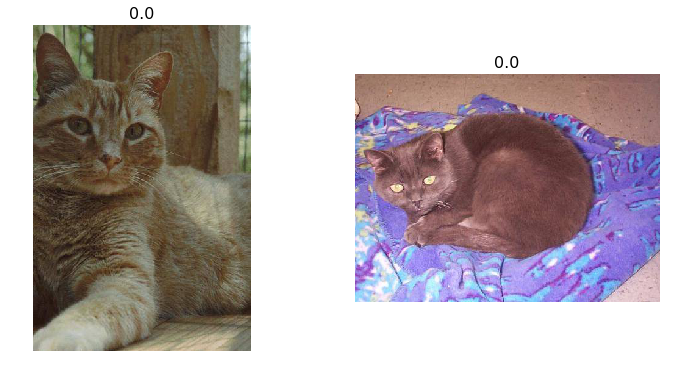

In [75]:
# plotting few images
plots([
    keras.preprocessing.image.load_img(non_shuffled_valid_batches.directory + non_shuffled_valid_batches.filenames[0]),
    keras.preprocessing.image.load_img(non_shuffled_valid_batches.directory + non_shuffled_valid_batches.filenames[1])
],
    titles = predicted_probs[:2, 1])

In [84]:
predicted_probs

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]], dtype=float32)

In [85]:
np.unique(predicted_probs)

array([  0.0000e+00,   1.4013e-45,   9.7522e-41,   1.2717e-40,   5.0860e-40,   3.6683e-39,
         1.3396e-38,   1.1333e-37,   1.0608e-35,   7.5897e-35,   1.5159e-31,   1.9749e-28,
         2.0331e-28,   1.2027e-26,   4.1894e-26,   6.4005e-24,   1.2925e-23,   8.1400e-20,
         5.2801e-18,   1.6777e-17,   1.2505e-15,   4.0935e-15,   1.3304e-12,   7.0861e-11,
         3.3826e-08,   1.9983e-07,   6.4554e-06,   6.4559e-06,   8.4515e-06,   8.6846e-06,
         3.3514e-03,   1.5854e-01,   8.4146e-01,   9.9665e-01,   9.9999e-01,   9.9999e-01,
         9.9999e-01,   1.0000e+00,   1.0000e+00], dtype=float32)